0. 초깃값 선정

    ${\hat{x}}_0,\ P_0$
<br>

1. 추정값과 오차 공분산 예측

    ${\hat{x}}_k^-=A{\hat{x}}_k$ <br>
$P_k^-=AP_{k-1}A^T+Q$
<br>

2. 칼만 이득 계산

    $K_k=P_k^-H^T\left(HP_k^-H^T+R\right)^{-1}$
<br>

3. 추정값 계산

    ${\hat{x}}_k={\hat{x}}_k^-+K_k\left(z_k-H{\hat{x}}_k^-\right)$
<br>

4. 오차 공분산 계산

    $P_k=P_k^--K_kHP_k^-$
<br>

---

$x_{k+1}=Ax_k+w_k$<br>
$z_k=Hx_k+v_k$<br>
$\mathcal{Q}=covariance\ matrix\ of\ w_k$<br>
$R=covariance\ matrix\ of\ v_k$


$x_{k+1}=x_k$<br>
$z_k=x_k+v_k$<br>
$x_0=14.4$<br>
$v_k=\mathcal{N}(0,2^2)$


---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def get_volt():
    """Measure voltage."""
    v = np.random.normal(0, 2)   # v: measurement noise.
    volt_true = 14.4             # volt_true: True voltage [V].
    z_volt_meas = volt_true + v  # z_volt_meas: Measured Voltage [V] (observable).
    return z_volt_meas

In [3]:
def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm for One Variable."""
    # (1) Prediction.
    x_pred = A * x_esti
    P_pred = A * P * A + Q

    # (2) Kalman Gain.
    K = P_pred * H / (H * P_pred * H + R)

    # (3) Estimation.
    x_esti = x_pred + K * (z_meas - H * x_pred)

    # (4) Error Covariance.
    P = P_pred - K * H * P_pred

    return x_esti, P

In [4]:
# Input parameters.
time_end = 10
dt = 0.2

In [5]:
# Initialization for system model.
A = 1
H = 1
Q = 0
R = 4
# Initialization for estimation.
x_0 = 12  # 14 for book.
P_0 = 6

In [6]:
time = np.arange(0, time_end, dt)
n_samples = len(time)
volt_meas_save = np.zeros(n_samples)
volt_esti_save = np.zeros(n_samples)

In [7]:
x_esti, P = None, None
for i in range(n_samples):
    z_meas = get_volt()
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    volt_meas_save[i] = z_meas
    volt_esti_save[i] = x_esti

Text(0, 0.5, 'Voltage [V]')

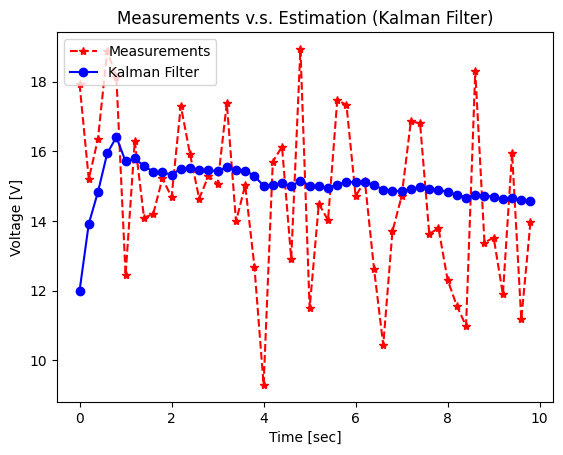

In [8]:
plt.plot(time, volt_meas_save, 'r*--', label='Measurements')
plt.plot(time, volt_esti_save, 'bo-', label='Kalman Filter')
plt.legend(loc='upper left')
plt.title('Measurements v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')
#plt.savefig('png/simple_kalman_filter.png')

## FilterPy를 이용한 변환

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=b8ed2909db4ce28dd5542e6f9564c92f91992cac7aebc04af7dc5056bb23d71c
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


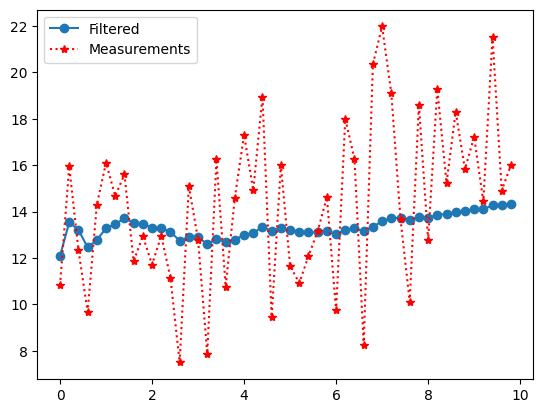

In [9]:
!pip install filterpy

import numpy as np
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt

# 랜덤 노이즈를 포함한 측정값 생성
def get_volt():
    return 14.4 + np.random.normal(0, 4)

# 칼만 필터 초기화
kf = KalmanFilter(dim_x=1, dim_z=1)
kf.F = np.array([[1]])  # 상태 전이 행렬
kf.H = np.array([[1]])  # 관측 행렬
kf.Q = np.array([[0]])  # 프로세스 잡음 공분산
kf.R = np.array([[4]])  # 측정 잡음 공분산
kf.P = np.array([[6]])  # 초기 공분산
kf.x = np.array([[14]]) # 초기 상태

# 칼만 필터 적용
def filterpy_kalman(z):
    kf.predict()
    kf.update(z)
    return kf.x[0, 0]

# 테스트
t = np.arange(0, 10, 0.2)
measurements = [get_volt() for _ in t]
filtered_values = [filterpy_kalman(z) for z in measurements]

# 시각화
plt.plot(t, filtered_values, 'o-', label="Filtered")
plt.plot(t, measurements, 'r:*', label="Measurements")
plt.legend()
plt.show()


## FilterPy를 이용한 변환 (단계별로 구분)

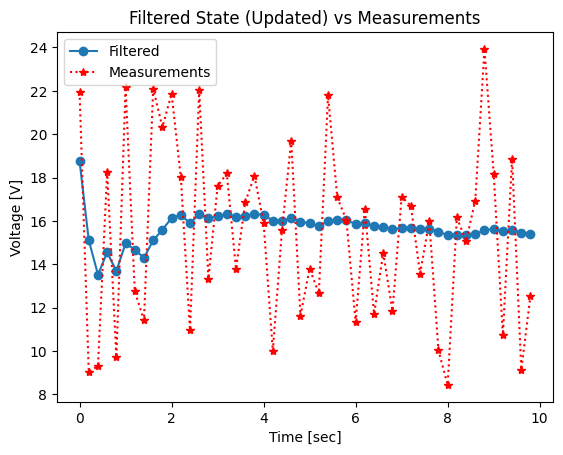

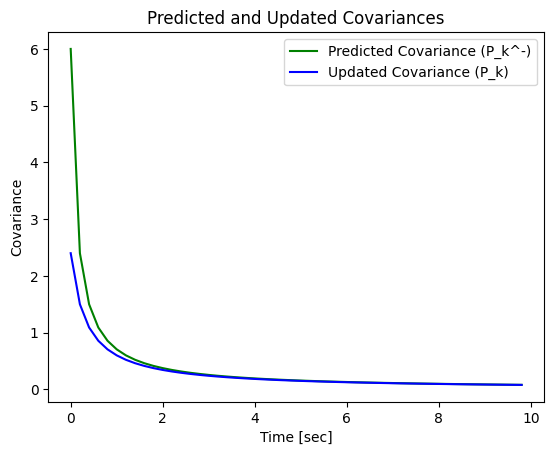

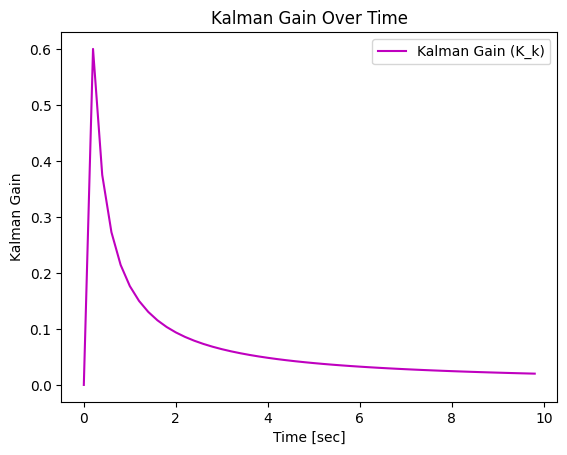

In [13]:
import numpy as np
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt

# 0. 초기값 설정 (초기 상태, 초기 공분산)
kf = KalmanFilter(dim_x=1, dim_z=1)
kf.F = np.array([[1]])  # 상태 전이 행렬 A
kf.H = np.array([[1]])  # 관측 행렬 H
kf.Q = np.array([[0]])  # 프로세스 잡음 공분산 Q
kf.R = np.array([[4]])  # 측정 잡음 공분산 R
kf.P = np.array([[6]])  # 초기 공분산 P
kf.x = np.array([[14]]) # 초기 상태 x

# 랜덤 노이즈를 포함한 측정값 생성
def get_volt():
    return 14.4 + np.random.normal(0, 4)

# 칼만 필터 추정 단계
def filterpy_kalman(z):
    # 1. 추정값과 오차 공분산 예측
    kf.predict()
    predicted_state = kf.x  # 예측된 상태 x_k^- (전치된 값)
    predicted_covariance = kf.P  # 예측된 공분산 P_k^-

    # 2. 칼만 이득 계산
    kalman_gain = kf.K  # K_k = P_k^- H^T (HP_k^- H^T + R)^-1

    # 3. 추정값 계산
    kf.update(z)
    updated_state = kf.x  # 업데이트된 상태 x_k

    # 4. 오차 공분산 계산
    updated_covariance = kf.P  # 업데이트된 공분산 P_k

    return predicted_state[0, 0], predicted_covariance[0, 0], kalman_gain[0, 0], updated_state[0, 0], updated_covariance[0, 0]

# 테스트 데이터 생성 및 추정
t = np.arange(0, 10, 0.2)
measurements = [get_volt() for _ in t]

# 각 단계의 데이터를 저장
results = []
for z in measurements:
    results.append(filterpy_kalman(z))

# 분리된 결과 배열
predicted_states = [r[0] for r in results]
predicted_covariances = [r[1] for r in results]
kalman_gains = [r[2] for r in results]
updated_states = [r[3] for r in results]
updated_covariances = [r[4] for r in results]

# 시각화
plt.figure()
plt.plot(t, updated_states, 'o-', label="Filtered")
plt.plot(t, measurements, 'r:*', label="Measurements")
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')
plt.legend()
plt.title("Filtered State (Updated) vs Measurements")

plt.figure()
plt.plot(t, predicted_covariances, 'g-', label="Predicted Covariance (P_k^-)")
plt.plot(t, updated_covariances, 'b-', label="Updated Covariance (P_k)")
plt.xlabel('Time [sec]')
plt.ylabel('Covariance')
plt.legend()
plt.title("Predicted and Updated Covariances")

plt.figure()
plt.plot(t, kalman_gains, 'm-', label="Kalman Gain (K_k)")
plt.xlabel('Time [sec]')
plt.ylabel('Kalman Gain')
plt.legend()
plt.title("Kalman Gain Over Time")
plt.show()


## PyKalman을 이용한 변환

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 5.4 MB/s eta 0:00:00


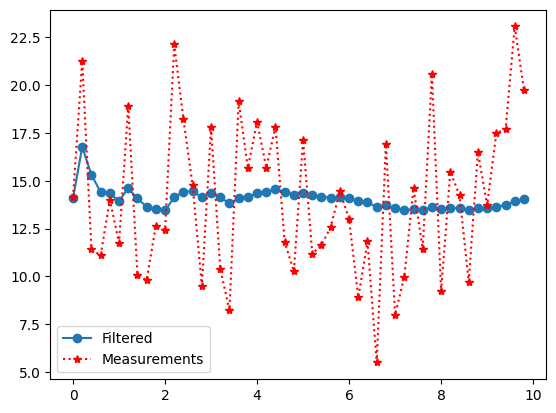

In [14]:
! pip install pykalman

from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# 랜덤 노이즈를 포함한 측정값 생성
def get_volt():
    return 14.4 + np.random.normal(0, 4)

# 전체 데이터 생성
t = np.arange(0, 10, 0.2)
measurements = [get_volt() for _ in t]

# 칼만 필터 초기화
kf = KalmanFilter(initial_state_mean=14, initial_state_covariance=6,
                  transition_matrices=[1], observation_matrices=[1],
                  transition_covariance=[[0]], observation_covariance=[[4]])

# 모든 데이터 필터링
filtered_values, _ = kf.filter(measurements)

# 시각화
plt.plot(t, filtered_values, 'o-', label="Filtered")
plt.plot(t, measurements, 'r:*', label="Measurements")
plt.legend()
plt.show()


## PyKalman을 이용한 변환 (단계별로 구분)

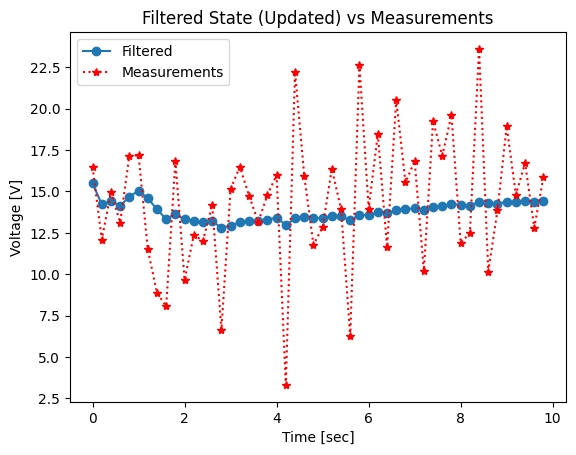

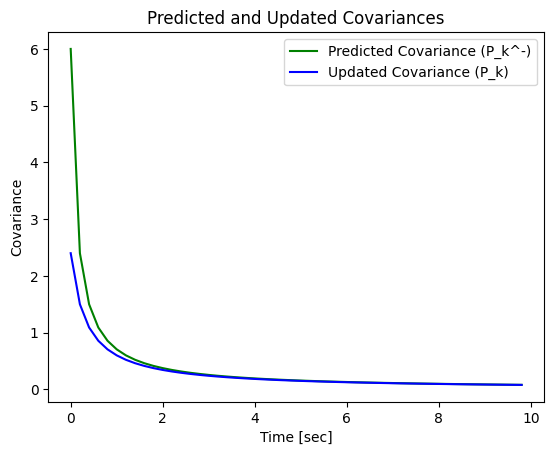

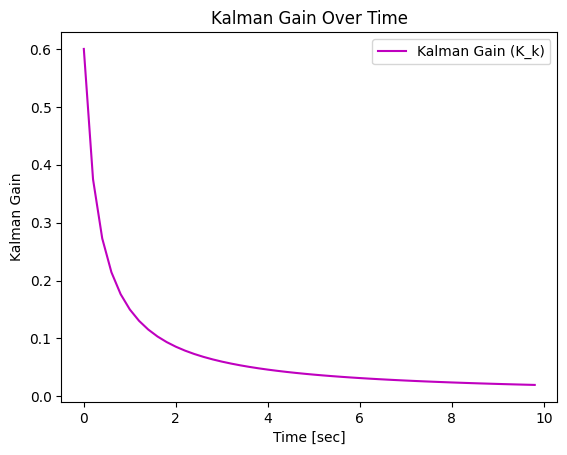

In [21]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# 0. 초기값 설정 (초기 상태, 초기 공분산)
kf = KalmanFilter(
    initial_state_mean=14,             # 초기 상태 x₀
    initial_state_covariance=6,        # 초기 공분산 P₀
    transition_matrices=[1],           # 상태 전이 행렬 A
    observation_matrices=[1],          # 관측 행렬 H
    transition_covariance=[[0]],       # 프로세스 잡음 공분산 Q
    observation_covariance=[[4]]       # 측정 잡음 공분산 R
)

# 랜덤 노이즈를 포함한 측정값 생성
def get_volt():
    return 14.4 + np.random.normal(0, 4)

# 전체 데이터 생성
t = np.arange(0, 10, 0.2)
measurements = [get_volt() for _ in t]

# 단계별 결과 저장
predicted_states = []
predicted_covariances = []
kalman_gains = []
updated_states = []
updated_covariances = []

# 칼만 필터 적용
state_mean = kf.initial_state_mean
state_covariance = kf.initial_state_covariance

for z in measurements:
    # 1. 추정값과 오차 공분산 예측
    predicted_state = np.dot(kf.transition_matrices, state_mean)  # A * xₖ₋₁
    predicted_covariance = (
        np.dot(kf.transition_matrices, np.dot(state_covariance, np.transpose(kf.transition_matrices)))
        + kf.transition_covariance
    )

    # 2. 칼만 이득 계산
    kalman_gain = (
        np.dot(predicted_covariance, np.transpose(kf.observation_matrices))
        / (np.dot(kf.observation_matrices, np.dot(predicted_covariance, np.transpose(kf.observation_matrices))) + kf.observation_covariance)
    )

    # 3. 추정값 계산
    updated_state = predicted_state + np.dot(kalman_gain, (z - np.dot(kf.observation_matrices, predicted_state)))

    # 4. 오차 공분산 계산
    updated_covariance = (
        predicted_covariance - np.dot(kalman_gain, np.dot(kf.observation_matrices, predicted_covariance))
    )

    # 저장
    predicted_states.append(predicted_state[0])
    predicted_covariances.append(predicted_covariance[0, 0])
    kalman_gains.append(kalman_gain[0, 0])
    updated_states.append(updated_state[0])
    updated_covariances.append(updated_covariance[0, 0])

    # 업데이트된 상태와 공분산을 다음 단계로 전달
    state_mean = updated_state
    state_covariance = updated_covariance

# 시각화
plt.figure()
plt.plot(t, updated_states, 'o-', label="Filtered")
plt.plot(t, measurements, 'r:*', label="Measurements")
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')
plt.legend()
plt.title("Filtered State (Updated) vs Measurements")

plt.figure()
plt.plot(t, predicted_covariances, 'g-', label="Predicted Covariance (P_k^-)")
plt.plot(t, updated_covariances, 'b-', label="Updated Covariance (P_k)")
plt.xlabel('Time [sec]')
plt.ylabel("Covariance")
plt.legend()
plt.title("Predicted and Updated Covariances")

plt.figure()
plt.plot(t, kalman_gains, 'm-', label="Kalman Gain (K_k)")
plt.xlabel('Time [sec]')
plt.ylabel("Kalman Gain")
plt.legend()
plt.title("Kalman Gain Over Time")
plt.show()


## OpenCV를 이용한 변환

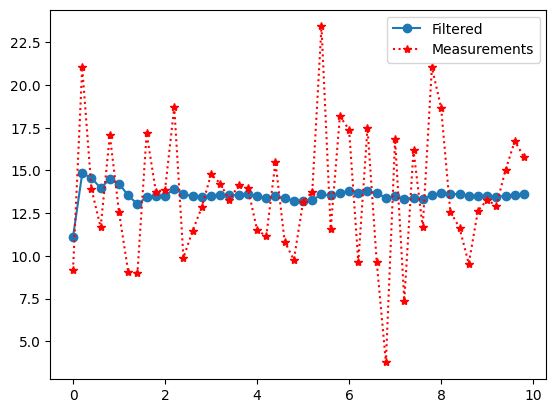

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 랜덤 노이즈를 포함한 측정값 생성
def get_volt():
    return 14.4 + np.random.normal(0, 4)

# OpenCV 칼만 필터 초기화
kf = cv2.KalmanFilter(1, 1)
kf.measurementMatrix = np.array([[1]], np.float32)
kf.transitionMatrix = np.array([[1]], np.float32)
kf.processNoiseCov = np.array([[0]], np.float32)
kf.measurementNoiseCov = np.array([[4]], np.float32)
kf.errorCovPost = np.array([[6]], np.float32)
kf.statePost = np.array([[14]], np.float32)

# 칼만 필터 적용
def opencv_kalman(z):
    kf.predict()
    kf.correct(np.array([[z]], np.float32))
    return kf.statePost[0, 0]

# 테스트
t = np.arange(0, 10, 0.2)
measurements = [get_volt() for _ in t]
filtered_values = [opencv_kalman(z) for z in measurements]

# 시각화
plt.plot(t, filtered_values, 'o-', label="Filtered")
plt.plot(t, measurements, 'r:*', label="Measurements")
plt.legend()
plt.show()


## OpenCV를 이용한 변환 (단계별로 구분)

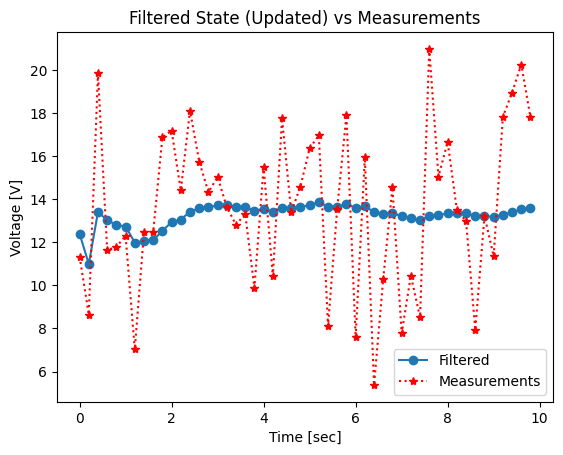

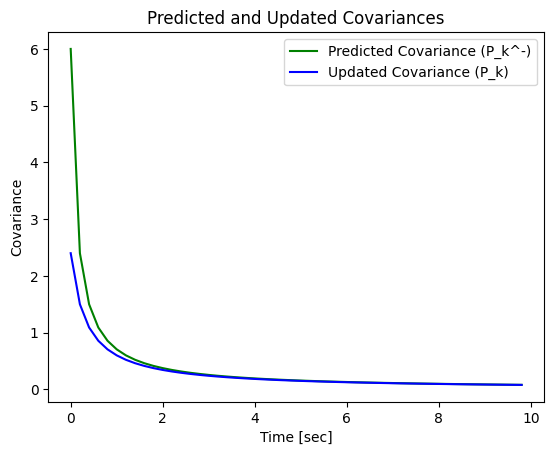

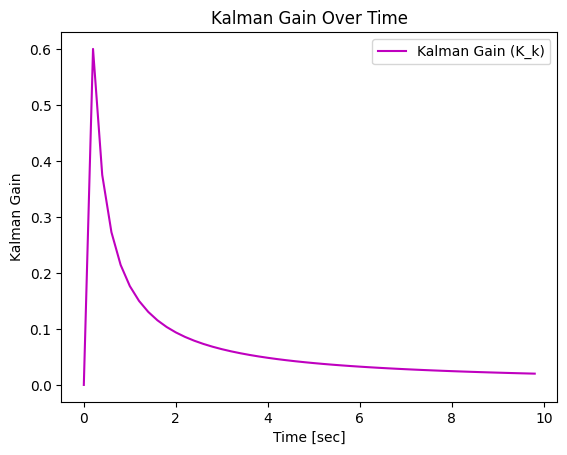

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 0. 초기화 (초기 상태, 초기 공분산)
kf = cv2.KalmanFilter(1, 1)
kf.measurementMatrix = np.array([[1]], np.float32)       # 관측 행렬 H
kf.transitionMatrix = np.array([[1]], np.float32)       # 상태 전이 행렬 A
kf.processNoiseCov = np.array([[0]], np.float32)        # 프로세스 잡음 공분산 Q
kf.measurementNoiseCov = np.array([[4]], np.float32)    # 측정 잡음 공분산 R
kf.errorCovPost = np.array([[6]], np.float32)           # 초기 공분산 P
kf.statePost = np.array([[14]], np.float32)             # 초기 상태 x

# 랜덤 노이즈를 포함한 측정값 생성
def get_volt():
    return 14.4 + np.random.normal(0, 4)

# 칼만 필터 적용
def opencv_kalman(z):
    # 1. 추정값과 오차 공분산 예측
    kf.predict()
    predicted_state = kf.statePre[0, 0]  # 예측된 상태 x_k^-
    predicted_covariance = kf.errorCovPre[0, 0]  # 예측된 공분산 P_k^-

    # 2. 칼만 이득 계산
    kalman_gain = kf.gain[0, 0]  # OpenCV가 자동 계산

    # 3. 추정값 계산
    kf.correct(np.array([[z]], np.float32))
    updated_state = kf.statePost[0, 0]  # 업데이트된 상태 x_k

    # 4. 오차 공분산 계산
    updated_covariance = kf.errorCovPost[0, 0]  # 업데이트된 공분산 P_k

    return predicted_state, predicted_covariance, kalman_gain, updated_state, updated_covariance

# 테스트
t = np.arange(0, 10, 0.2)
measurements = [get_volt() for _ in t]

# 단계별 결과 저장
results = []
for z in measurements:
    results.append(opencv_kalman(z))

# 분리된 결과 배열
predicted_states = [r[0] for r in results]
predicted_covariances = [r[1] for r in results]
kalman_gains = [r[2] for r in results]
updated_states = [r[3] for r in results]
updated_covariances = [r[4] for r in results]

# 시각화
plt.figure()
plt.plot(t, updated_states, 'o-', label="Filtered")
plt.plot(t, measurements, 'r:*', label="Measurements")
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')
plt.legend()
plt.title("Filtered State (Updated) vs Measurements")

plt.figure()
plt.plot(t, predicted_covariances, 'g-', label="Predicted Covariance (P_k^-)")
plt.plot(t, updated_covariances, 'b-', label="Updated Covariance (P_k)")
plt.xlabel('Time [sec]')
plt.ylabel('Covariance')
plt.legend()
plt.title("Predicted and Updated Covariances")

plt.figure()
plt.plot(t, kalman_gains, 'm-', label="Kalman Gain (K_k)")
plt.xlabel('Time [sec]')
plt.ylabel('Kalman Gain')
plt.legend()
plt.title("Kalman Gain Over Time")
plt.show()


## Python 기본 구현

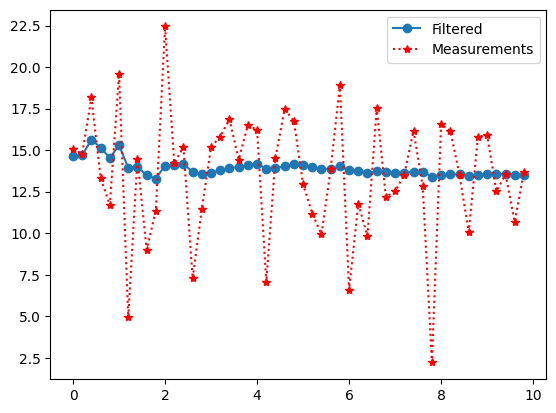

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 초기화
A = 1  # 상태 전이 행렬
H = 1  # 관측 행렬
Q = 0  # 프로세스 잡음 공분산
R = 4  # 측정 잡음 공분산
x = 14  # 초기 상태
P = 6   # 초기 공분산

# 랜덤 노이즈를 포함한 측정값 생성
def get_volt():
    return 14.4 + np.random.normal(0, 4)

# 칼만 필터 적용
def basic_kalman(z):
    global x, P
    # 예측 단계
    xp = A * x
    Pp = A * P * A + Q

    # 칼만 이득 계산
    K = Pp * H / (H * Pp * H + R)

    # 업데이트 단계
    x = xp + K * (z - H * xp)
    P = Pp - K * H * Pp

    return x

# 테스트
t = np.arange(0, 10, 0.2)
measurements = [get_volt() for _ in t]
filtered_values = [basic_kalman(z) for z in measurements]

# 시각화
plt.plot(t, filtered_values, 'o-', label="Filtered")
plt.plot(t, measurements, 'r:*', label="Measurements")
plt.legend()
plt.show()


## Python 기본 구현 (단계별로 구분)

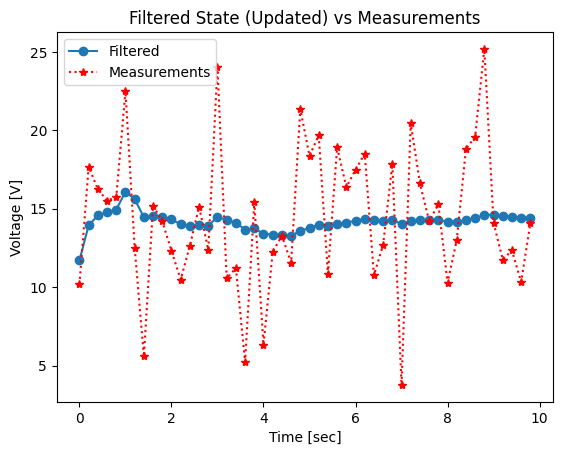

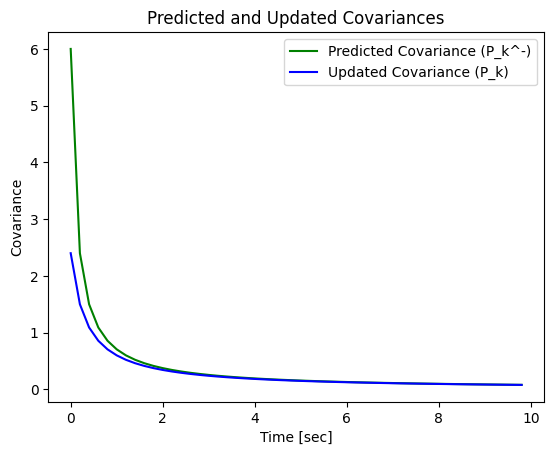

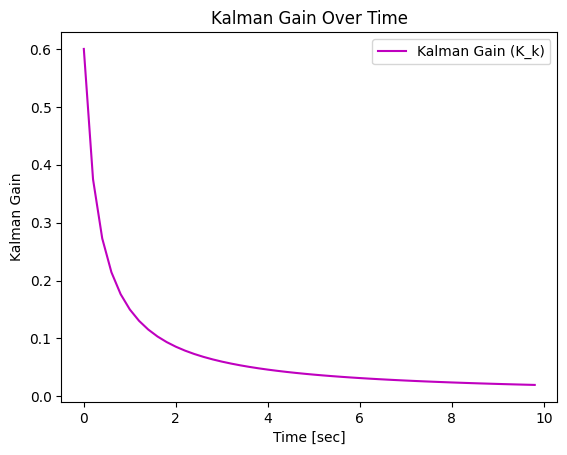

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 0. 초기화 (초기 상태, 초기 공분산)
A = 1  # 상태 전이 행렬
H = 1  # 관측 행렬
Q = 0  # 프로세스 잡음 공분산
R = 4  # 측정 잡음 공분산
x = 14  # 초기 상태
P = 6   # 초기 공분산

# 랜덤 노이즈를 포함한 측정값 생성
def get_volt():
    return 14.4 + np.random.normal(0, 4)

# 칼만 필터 적용
def basic_kalman(z):
    global x, P
    # 1. 추정값과 오차 공분산 예측
    xp = A * x
    Pp = A * P * A + Q

    # 2. 칼만 이득 계산
    K = Pp * H / (H * Pp * H + R)

    # 3. 추정값 계산
    x = xp + K * (z - H * xp)

    # 4. 오차 공분산 계산
    P = Pp - K * H * Pp

    return xp, Pp, K, x, P

# 테스트
t = np.arange(0, 10, 0.2)
measurements = [get_volt() for _ in t]

# 단계별 결과 저장
results = []
for z in measurements:
    results.append(basic_kalman(z))

# 분리된 결과 배열
predicted_states = [r[0] for r in results]
predicted_covariances = [r[1] for r in results]
kalman_gains = [r[2] for r in results]
updated_states = [r[3] for r in results]
updated_covariances = [r[4] for r in results]

# 시각화
plt.figure()
plt.plot(t, updated_states, 'o-', label="Filtered")
plt.plot(t, measurements, 'r:*', label="Measurements")
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')
plt.legend()
plt.title("Filtered State (Updated) vs Measurements")

plt.figure()
plt.plot(t, predicted_covariances, 'g-', label="Predicted Covariance (P_k^-)")
plt.plot(t, updated_covariances, 'b-', label="Updated Covariance (P_k)")
plt.xlabel('Time [sec]')
plt.ylabel('Covariance')
plt.legend()
plt.title("Predicted and Updated Covariances")

plt.figure()
plt.plot(t, kalman_gains, 'm-', label="Kalman Gain (K_k)")
plt.xlabel('Time [sec]')
plt.ylabel('Kalman Gain')
plt.legend()
plt.title("Kalman Gain Over Time")
plt.show()
